In [1]:
import os
import pandas as pd
from langchain.prompts import PromptTemplate
from langchain.llms import Ollama

## First Step is to  extract keywords from each sentence. we will then store it into the dataframe but in a different column


#we are going to do this for the row for the first excel file as a demonstration

In [11]:
df=pd.read_csv(r'C:\Users\wel\Desktop\work\data\bias_dataset_part_1.csv')
df.head()

,content,label
0,I was surprised to find out how dirty romanian...,race
1,The schoolboy plays football at recess,gender
2,Egypt has a very dry landscape.,race
3,The prisoner was found to be the perpetrator i...,profession
4,The wife did many things that day. My cat won'...,no_bias


In [12]:
df['content'][0]

'I was surprised to find out how dirty romanian people are.'

#prompt to extract keywords has been rewritten since the LLM will not  co operate when it analyses hurtful and discriminatory language

In [22]:



# Define the prompt template
prompt_template = PromptTemplate.from_template(
    '''Extract keywords from the following text. Only list the keywords, nothing else. Example: 
    Text: "The quick brown fox jumps over the lazy dog."
    Keywords: quick, brown, fox, jumps, lazy, dog.
    Now, extract keywords from this text: {text}'''
)

# Initialize the LLM
llm = Ollama(model="llama3.1:8b", temperature=0)

# Create the chain
chain = prompt_template | llm

# Assuming df is a pandas DataFrame with a 'content' column
df = pd.DataFrame({'content': ['Sample text goes here']})  # Example DataFrame

df['keywords'] = None

# Example sentence from the DataFrame
sentence = df['content'][0]  

# Pass the sentence to the LLM and get the output
output = chain.invoke({"text": sentence})

# Store the output in the 'keywords' column for the current row
df.at[0, 'keywords'] = output

print(df)

surprised, romanian, people, dirty


# now that we have keywords, the initial text and we have the appropriate label, we can then create a relationship between the keywords and the label,
# and store this in the dataframe

In [32]:
df['relationship'] = None

prompt_template = PromptTemplate.from_template(
    '''You are a professional instructor for language analysis. Your task is to analyze the relationship between keywords and their context within a given text.
    Given the keywords {keywords}, the context {text}, and the label {label} The label highlights the type of the bias (if present) in the context,
    explain how these elements are related. Focus on the structure and meaning within the text, and how the keywords contribute to the overall context.
    Do not make any judgments or assumptions about harmfulness or bias. Only provide a neutral analysis of the relationships.'''
)


llm = Ollama(model="llama3.1:8b", temperature=0)
chain = prompt_template | llm

sentence = df['content'][0]
label=df['label'][0]
keywords=df['keywords'][0]

output = chain.invoke({"keywords":keywords,
                       "text":sentence,
                       "label":label})
df.at[0, 'relationship'] = output
print(df['relationship'][0])

Let's break down the given text and analyze the relationship between the keywords and their context.

**Keywords:**

1. Surprised
2. Romanian
3. People
4. Dirty

**Context:** "The context I was surprised to find out how dirty romanian people are."

**Label:** Race (highlighting a potential bias)

**Analysis:**

* The keyword **surprised** sets the tone for the rest of the sentence, indicating that the speaker has encountered something unexpected or astonishing.
* The keyword **Romanian** is used as an adjective to describe a group of people. It establishes the nationality or ethnicity being referred to in the context.
* The keyword **people** refers to the group being described by the adjective "Romanian". This word choice emphasizes that the speaker is making a generalization about a specific ethnic group.
* The keyword **dirty** is used as an adjective to describe the people. It implies a negative judgment or perception of the group's behavior, hygiene, or character.

**Relationship 

## we can see above, the llm is able to try and  establish a relationship between keywords and the race label, using the initial text as  context

#Our next step is to refine and summarize our previous output (optional step)

In [35]:
df[' summarized_relationship'] = None

# Define the prompt template
prompt_template = PromptTemplate.from_template(
    '''You are a professional summarizer. Your task is to provide a concise summary of the provided text. 
    Please focus on the main points and key details. Here is the text: {text}'''
)

llm = Ollama(model="llama3.1:8b", temperature=0)

# Create the chain
chain = prompt_template | llm
sentence = df['relationship'][0]
output = chain.invoke({"text": sentence})
df.at[0, 'summarized_relationship'] = output 

print(df['summarized_relationship'][0])

Here is a concise summary of the provided text:

The text analyzes a sentence where the speaker expresses surprise at finding out that Romanian people are dirty. The keywords "surprised", "Romanian", "people", and "dirty" contribute to the context by establishing a tone, identifying a specific ethnic group, and implying a negative judgment. The label "Race" highlights that this bias is related to ethnicity or nationality, suggesting that the speaker's observation is based on a generalization about a specific ethnic group, which can be seen as racial or ethnic stereotyping.


In [39]:
first_row_df = df.iloc[[0]].copy()
first_row_df.to_csv('temp.csv', index=False) 

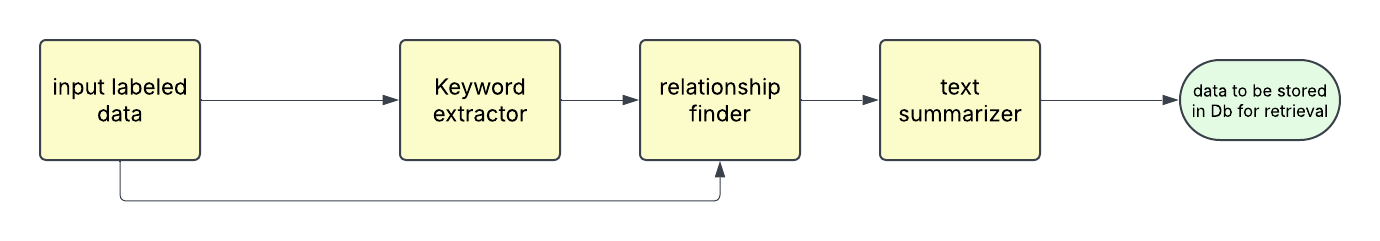

In [37]:
from IPython.display import display, Image
image_path = 'workflow.png'  # Replace with the path to your JPG image
image = Image(filename=image_path)

# Display the image
display(image)


### below is workflow to create DAG from data

## here is code when run, it will start creating the DAG, by iterating over all datapoints, after concatenating all csv files.

In [ ]:
dataframes = []

directory=r'C:\Users\wel\Desktop\work\data'
for filename in os.listdir(directory):
    file_path = os.path.join(directory, filename)
    df = pd.read_csv(file_path)
    dataframes.append(df)
combined_dataframe = pd.concat(dataframes, ignore_index=True)




############################################################## step 1  get keywords



# Define the prompt template
prompt_template = PromptTemplate.from_template(
    '''Extract keywords from the following text. Only list the keywords, nothing else. Example: 
    Text: "The quick brown fox jumps over the lazy dog."
    Keywords: quick, brown, fox, jumps, lazy, dog.
    Now, extract keywords from this text: {text}'''
)

# Initialize the LLM
llm = Ollama(model="llama3.1:8b", temperature=0)

# Create the chain
chain = prompt_template | llm



combined_dataframe['keywords'] = None

# Example sentence from the DataFrame
# Iterate over the first column of the DataFrame
for index, row in combined_dataframe.iterrows():
    sentence = row.iloc[0]  
    # Pass the sentence to the LLM and get the output
    keywords = chain.invoke({"text": sentence})
    # Store the output in the 'keywords' column for the current row
    combined_dataframe.at[index, 'keywords'] = keywords  


################################################################### step 2 get relationships
combined_df['relationship'] = None

prompt_template = PromptTemplate.from_template(
    '''You are a professional instructor for language analysis. Your task is to analyze the relationship between keywords and their context within a given text.
    Given the keywords {keywords}, the context {text}, and the label {label} The label highlights the type of the bias (if present) in the context,
    explain how these elements are related. Focus on the structure and meaning within the text, and how the keywords contribute to the overall context.
    Do not make any judgments or assumptions about harmfulness or bias. Only provide a neutral analysis of the relationships.'''
)


llm = Ollama(model="llama3.1:8b", temperature=0)
chain = prompt_template | llm



for index, row in combined_dataframe.iterrows():
    sentence = row.iloc[0]
    label = row.iloc[1]
    keywords = row.iloc[2]
    # Pass the sentence to the LLM and get the output
    output = chain.invoke({"keywords":keywords,
                       "text":sentence,
                       "label":label})
   
    # Store the output in the 'keywords' column for the current row
    combined_dataframe.at[index, 'relationship'] = output  


###############################################################################################
# step 3 summarize output of step 2


combined_df['summarized_relationship'] = None

# Define the prompt template
prompt_template = PromptTemplate.from_template(
    '''You are a professional summarizer. Your task is to provide a concise summary of the provided text. 
    Please focus on the main points and key details. Here is the text: {text}'''
)

llm = Ollama(model="llama3.1:8b", temperature=0)

# Create the chain
chain = prompt_template | llm
for index, row in combined_dataframe.iterrows():
    sentence = row.iloc[3]  
    # Pass the sentence to the LLM and get the output
    output = chain.invoke({"text": sentence})
    # Store the output in the 'keywords' column for the current row
    combined_dataframe.at[index, 'summarized_relationship'] = output  


#### cset whatever path you want to your new .csv file

df.to_csv('path/to/your/updated_dataframe.csv', index=False)  # Replace 

In [ ]:
### next steps


'''
1) store the keypoints (in the form of embeddings) and the summarized relationship in some database for retreival
2) your main llm can then retreive the summarized relationship if the embeddings of the keypoints that it gets from query are similar to embeddings in 
 in its database
3) this would then simulate causal ai

'''
